In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
test_df = pd.read_csv('test.csv')
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


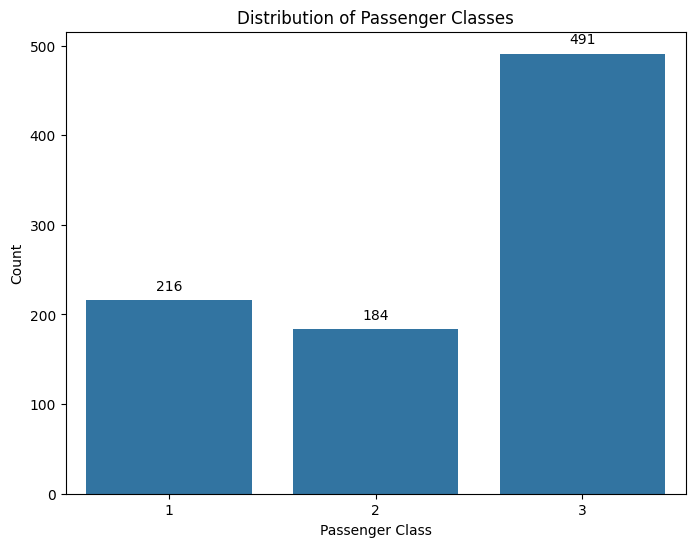

In [4]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Pclass')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Distribution of Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

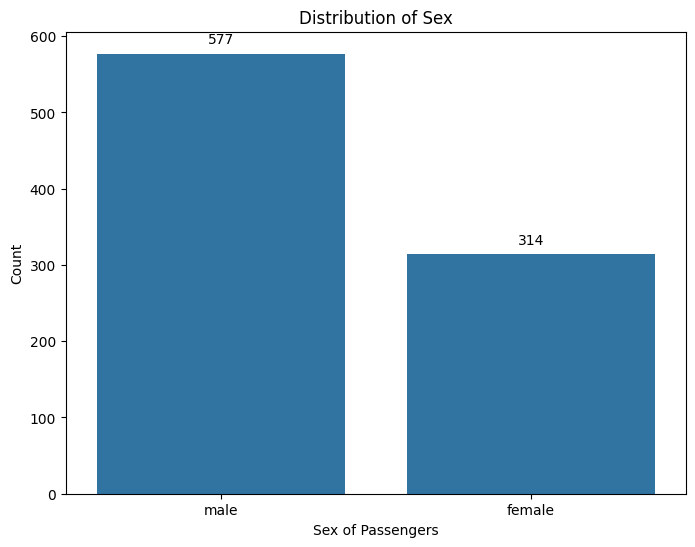

In [5]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Sex')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Distribution of Sex')
plt.xlabel('Sex of Passengers')
plt.ylabel('Count')
plt.show()

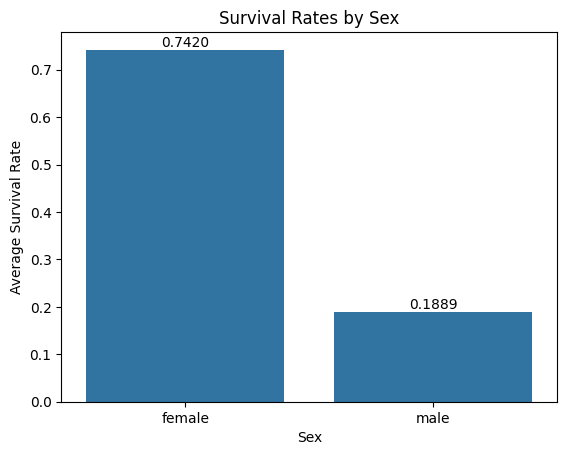

In [6]:
# Calculate the mean survival rates by sex
survival_rates = df.groupby('Sex')['Survived'].mean().reset_index()

# Create the bar plot
sns.barplot(x='Sex', y='Survived', data=survival_rates)

# Adding the actual survival rates on top of the bars
for index, value in enumerate(survival_rates['Survived']):
    plt.text(index, value, f'{value:.4f}', ha='center', va='bottom')

# Set the title and labels for the plot
plt.title('Survival Rates by Sex')
plt.ylabel('Average Survival Rate')
plt.xlabel('Sex')

# Display the plot
plt.show()

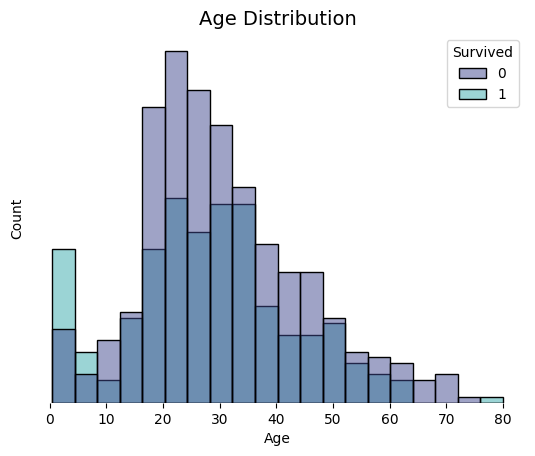

In [7]:
sns.histplot(x="Age", hue="Survived", palette="mako", data=df[["Age","Survived"]])
plt.title("Age Distribution", color='black', fontsize=14) 
plt.yticks([])
plt.box(False)
plt.show()

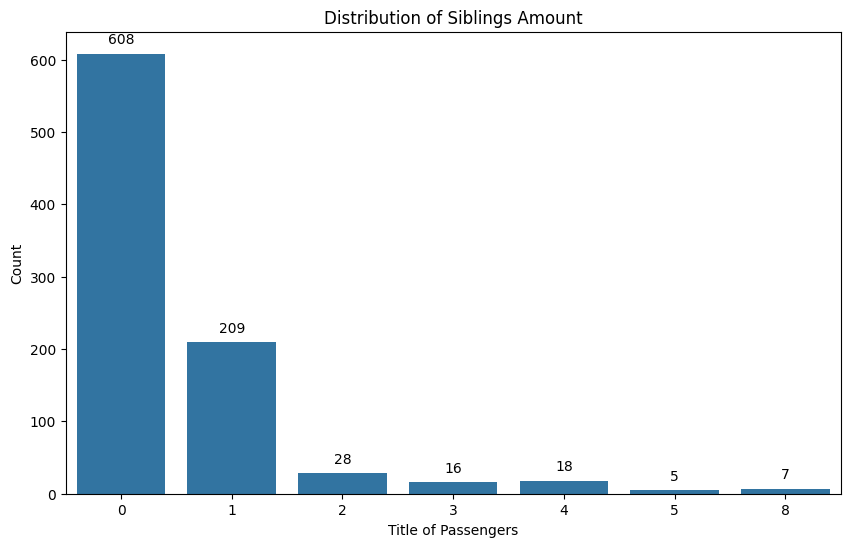

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='SibSp')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Distribution of Siblings Amount')
plt.xlabel('Title of Passengers')
plt.ylabel('Count')
plt.show()

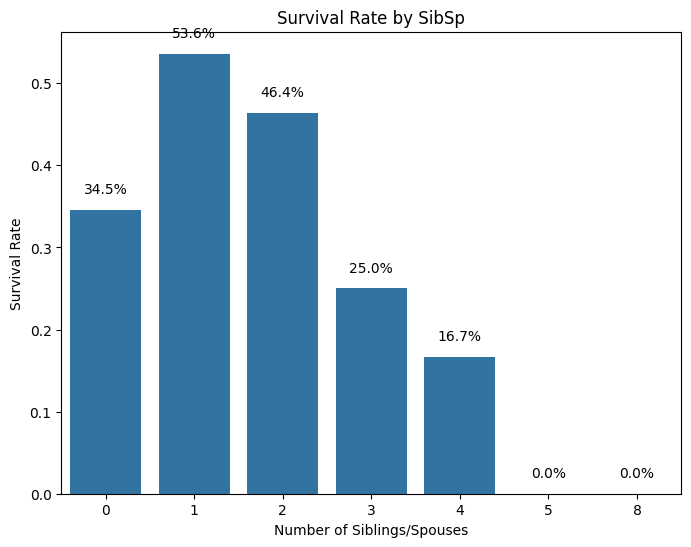

In [9]:
survival_by_sibsp = df.groupby('SibSp')['Survived'].mean()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=survival_by_sibsp.index, y=survival_by_sibsp.values)
plt.title('Survival Rate by SibSp')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.02, '{:.1%}'.format(height), ha="center")

plt.show()

In [10]:
df["Ticket"].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [11]:
newdf = df.copy()

newdf["Group_Size"] = newdf.groupby("Ticket")["PassengerId"].transform("count")
newdf["Group_Size"] 

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: Group_Size, Length: 891, dtype: int64

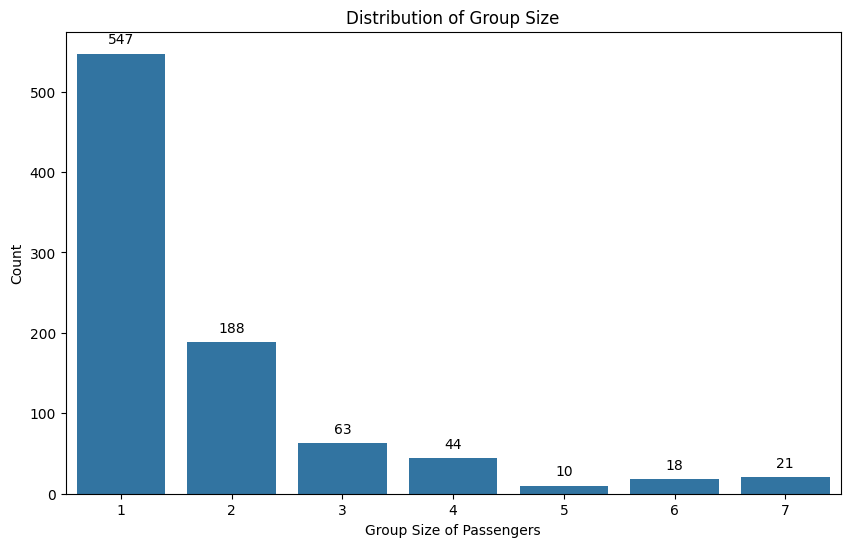

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=newdf, x='Group_Size')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Distribution of Group Size')
plt.xlabel('Group Size of Passengers')
plt.ylabel('Count')
plt.show()

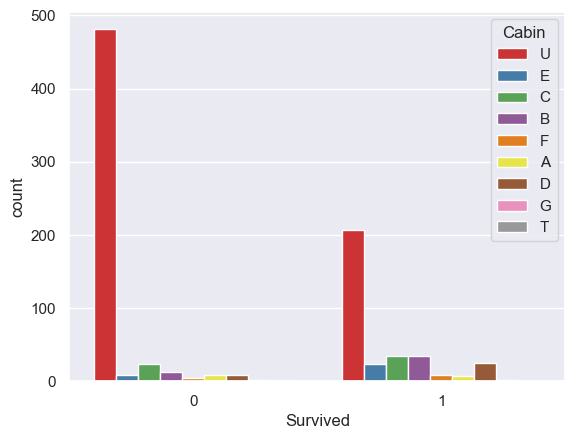

In [13]:
newdf = df.copy()
newdf["Cabin"].fillna("Unknown",inplace=True)
newdf["Cabin"] = newdf["Cabin"].str[0]
sns.set(style="darkgrid")
sns.countplot( x='Survived', data=newdf, hue="Cabin", palette="Set1");


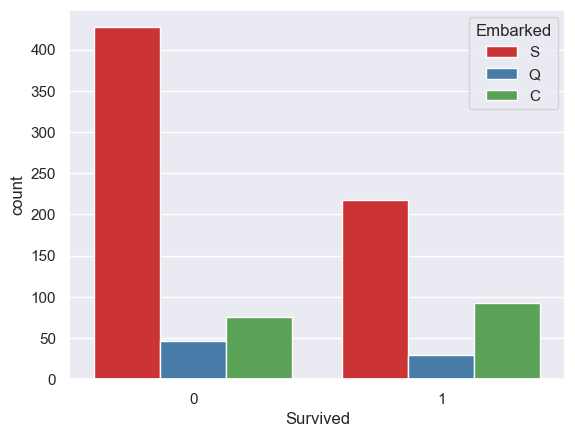

In [14]:
sns.set(style="darkgrid")
sns.countplot( x='Survived', data=df, hue="Embarked", palette="Set1");

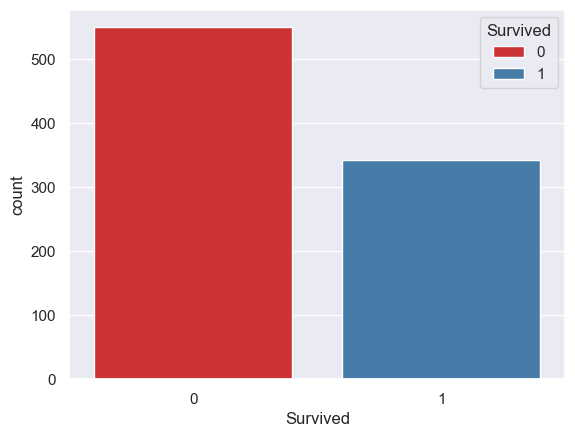

In [15]:
sns.set(style="darkgrid")
sns.countplot( x='Survived', data=df, hue="Survived", palette="Set1");


In [19]:
def missing_zero_values_table(df):
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
    mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
    mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[ mz_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
           "There are " + str(mz_table.shape[0]) +
            "columns that have missing values.")
    return mz_table


missing_zero_values_table(df)


Your selected dataframe has 12 columns and 891 Rows.
There are 3columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Cabin,0,687,77.1,687,77.1,object
Age,0,177,19.9,177,19.9,float64
Embarked,0,2,0.2,2,0.2,object


In [20]:
missing_zero_values_table(test_df)

Your selected dataframe has 11 columns and 418 Rows.
There are 3columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Cabin,0,327,78.2,327,78.2,object
Age,0,86,20.6,86,20.6,float64
Fare,2,1,0.2,3,0.7,float64


In [21]:
def clean_data(data):
    data['Fare'] = data['Fare'].fillna(data['Fare'].dropna().median())
    data['Age'] =  data['Age'].fillna(data['Age'].dropna().median())
    
    data.loc[data['Sex'] == 'male', 'Sex'] = 0
    data.loc[data['Sex'] =='female',  'Sex'] = 1
    
    data['Embarked'] = data['Embarked'].fillna('S')
    data.loc[data["Embarked"] == 'S', 'Embarked'] = 0
    data.loc[data['Embarked'] == 'C', 'Embarked'] = 1
    data.loc[data['Embarked'] == 'Q', 'Embarked'] =2
    
    data.drop(["Cabin"],axis=1,inplace=True)

In [22]:
clean_data(df)
clean_data(test_df)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df["Survived"] = df["Survived"].astype(int)
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
y = df["Survived"].values


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,stratify=y, random_state = 105)

In [24]:
X_train

array([[2, 1, 17.0, ..., 0, 10.5, 0],
       [3, 1, 14.0, ..., 0, 11.2417, 1],
       [1, 0, 51.0, ..., 0, 26.55, 0],
       ...,
       [1, 0, 45.0, ..., 0, 26.55, 0],
       [3, 0, 27.0, ..., 0, 6.975, 0],
       [3, 0, 21.0, ..., 0, 8.4333, 0]], dtype=object)

In [25]:
y_train

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,

In [26]:
dt_hyperparameters= {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_hyperparameters= {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1],
                 "C": [1,10,50,100,250,500]}


rf_hyperparameters= {"max_depth":[1,3,5,7],
                "min_samples_leaf":[1,3,5],
                "n_estimators":[50,100,150]}

knn_hyperparameters= {"n_neighbors": [1,3,5,7],
                 "metric":["manhattan"]} 
             
classifier_param = [
                    dt_hyperparameters,
                   svc_hyperparameters,
                   rf_hyperparameters,
                   knn_hyperparameters]

In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.exceptions import ConvergenceWarning
# Suppress ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

random_state=45
classifier = [
             DecisionTreeClassifier(random_state = random_state),
             SVC(),
             RandomForestClassifier(random_state = random_state),
             KNeighborsClassifier()]


cv_result = []
real_test_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    real_test_result.append(clf.score(X_test, y_test)) 

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [28]:
best_estimators

[DecisionTreeClassifier(max_depth=7, min_samples_split=10, random_state=45),
 SVC(C=500, gamma=0.001),
 RandomForestClassifier(max_depth=3, min_samples_leaf=3, n_estimators=50,
                        random_state=45),
 KNeighborsClassifier(metric='manhattan', n_neighbors=7)]

In [29]:
cv_results = pd.DataFrame({ "Machine Learning Models":
                                               ["Decision Tree Classifier", 
                                                "Support Vector Machines",
                                                "Random Forest Classifier",
                                                 "K Nearest Neighbors Classifier"],
                           "Cross Validation Mean": cv_result, 
                           "Test Result": real_test_result})
cv_results

,Machine Learning Models,Cross Validation Mean,Test Result
0,Decision Tree Classifier,0.820293,0.866667
1,Support Vector Machines,0.806512,0.833333
2,Random Forest Classifier,0.824012,0.844444
3,K Nearest Neighbors Classifier,0.745370,0.744444


In [30]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[
                                      ('Decision Tree Classifier', best_estimators[0]), 
                                      ('Random Forest Classifier', best_estimators[2]),
                                      ('K Nearest Neighbors Classifier', best_estimators[3])])
voting.fit(X_train,y_train)
voting_pred = voting.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, voting_pred))

Accuracy:  0.8777777777777778


In [31]:
submission= pd.read_csv("gender_submission.csv")
test =  test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
submission["Survived"]=voting.predict(test)
submission.to_csv('submission.csv',index=False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
